In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir('/home/arthur/Dropbox/projects/ambrals_modeling/')



none
none
none


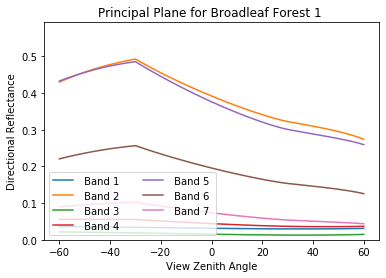

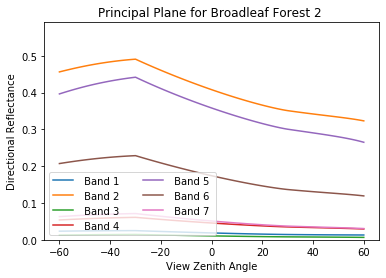

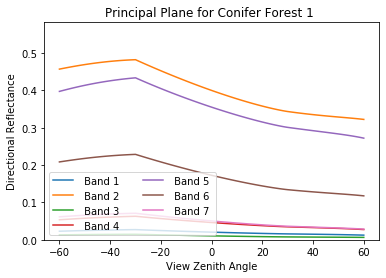

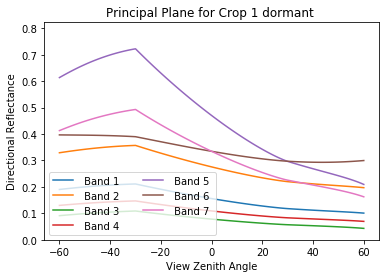

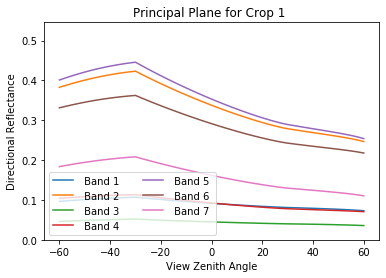

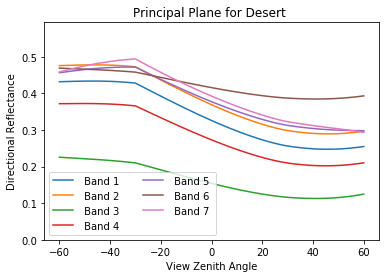

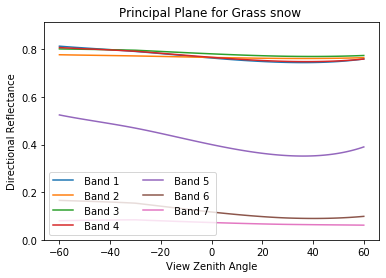

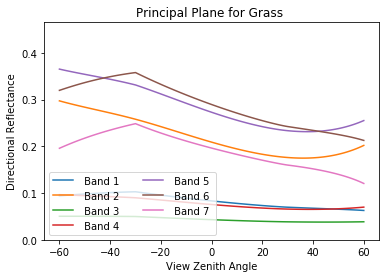

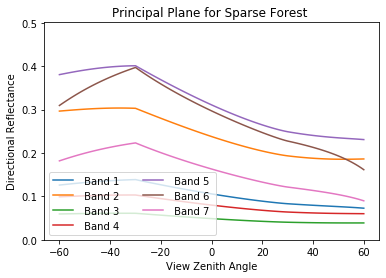

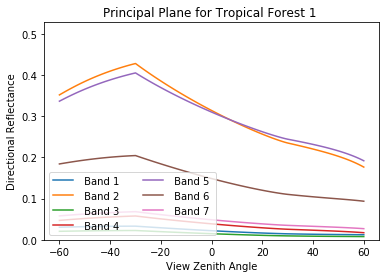

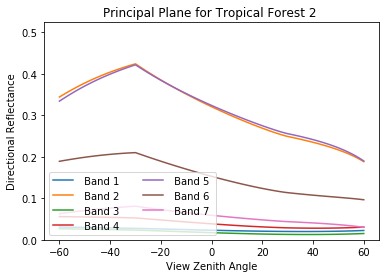

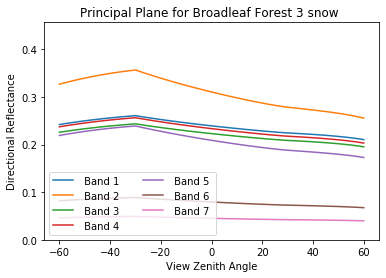

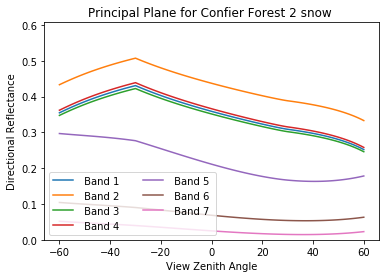

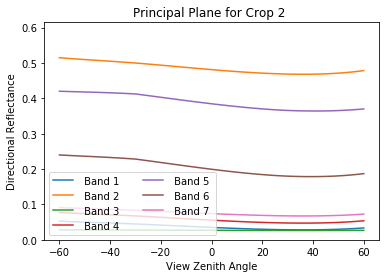

In [7]:
#sites=['brdlf_for1', 'brdlf_for2', 'brdlf_for2_pt_snow', 'brdlf_for3_snow', 'con_for1', 'con_for1_pt_snow',
#       'con_for2_snow', 'crop1', 'crop1_dorm', 'crop2', 'desert', 'grass', 'grass_snow', 'perm_snow', 
#       'sparse_for', 'tundra', 'tundra_snow', 'trop_forest1', 'trop_forest2',]

sites=['Broadleaf Forest 1 ', 'Broadleaf Forest 2 ','Conifer Forest 1 ','Crop 1 dormant ','Crop 1 ','Desert ',
       'Grass snow ','Grass ','Permanent snow ','Sparse Forest ','Tundra snow ','Tundra ','Tropical Forest 1 ',
       'Tropical Forest 2 ','Broadleaf Forest 3 snow ','Confier Forest 2 snow ','Crop 2 ']

for site in sites:
    csv = pd.read_csv('BRDF_LUT_principal_plane.csv')
    csv = csv[csv["land cover"]==site]
    csv = csv[csv["szen"]==30.0]
    csv = csv.sort_values(['modis_band', 'vzen'])

    if len(csv) == 0:
        print("none")
        pass
    else:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')

        # Plot each band
        for b in range(1, 8):
            band_name = ' Band ' + str(b) + ' '
            csv_band = csv.loc[csv['modis_band'] == band_name]
            plt.plot(csv_band['vzen'], csv_band['directional_ref'], label=band_name)
        
        ax.set_ylim(0.0, csv['directional_ref'].max() + 0.1)
        plt.legend(loc='lower left', ncol=2)
        ax.set_xlabel('View Zenith Angle')
        ax.set_ylabel('Directional Reflectance')
        ax.set_title('Principal Plane for {x}'.format(x=site))
        plt.savefig('dir_ref_pp_{x}.png'.format(x=site))

    #try: 
    #   dir_ref.plot(x='vzen', y='directional_ref', kind='scatter', ylim = (0.0, 0.5),
    #                title='Directional Reflectance for {x}, SZA=30.0, Relaz=120'.format(x=site))
    #   plt.savefig('dir_ref_{x}.png'.format(x=site))
    #xcept:
    #   pass

In [16]:
dir_ref = dir_ref[["directional_ref", "vzen"]]
dir_ref.head()

,directional_ref,vzen
0,0.413089,-60
1,0.412453,-59
2,0.411846,-58
3,0.411268,-57
4,0.410716,-56
